In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# import libraries
import seaborn as sns

In [3]:
gs = pd.read_csv("../input/titanic/gender_submission.csv")
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/train.csv")


In [4]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [7]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
# dropping cabin as most of the values are missing
train.drop(columns='Cabin',inplace=True)

In [9]:
train[train['Age'].isnull()].groupby(by='Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.466667,NaN,0.200000,0.033333,60.551940
2,0.363636,NaN,0.000000,0.000000,7.932955
3,0.250000,NaN,0.691176,0.227941,14.840041


In [10]:
mean_value = train.groupby(by=['SibSp','Pclass','Parch'])[['Age']].mean()
mean_value.tail()

Age
SibSp Pclass Parch           
3     3      2       6.250000
4     3      1       6.777778
             2       7.333333
5     3      2      10.200000
8     3      2            NaN

In [11]:
mean_value.loc[(0,1,0),]

Age    41.005814
Name: (0, 1, 0), dtype: float64

In [12]:
train_nan = train[train['Age'].isnull()].groupby(by=['SibSp','Pclass','Parch'])[['Age']].mean()
train_nan.tail()

Age
SibSp Pclass Parch     
1     3      1      NaN
             2      NaN
2     3      0      NaN
3     3      1      NaN
8     3      2      NaN

In [13]:
for row_index, group in train_nan.iterrows():
    for i, record in train[train['Age'].isnull()].iterrows():
        if(record['SibSp']==row_index[0] and record['Pclass']==row_index[1] and record['Parch']==row_index[2]):
            train.at[i,'Age'] = mean_value.loc[row_index,]

In [14]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         7
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [15]:
train_nan = train[train['Age'].isnull()].groupby(by=['SibSp','Pclass','Parch'])[['Age']].mean()
train_nan.head()

,,,Age
SibSp,Pclass,Parch,
8,3,2,NaN


In [16]:
for row_index, group in train_nan.iterrows():
    for i, record in train[train['Age'].isnull()].iterrows():
        if(record['Pclass']==row_index[1] and record['Parch']==row_index[2]):
            train.at[i,'Age'] = mean_value.loc[row_index,]

In [17]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         7
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [18]:
train.dropna(inplace=True)
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

(array([732.,  97.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

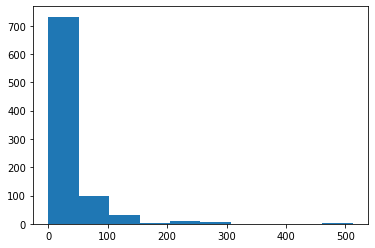

In [19]:
from matplotlib import pyplot as plt
plt.hist(train['Fare'])
# most of the passanger have paid below 100 units of fare

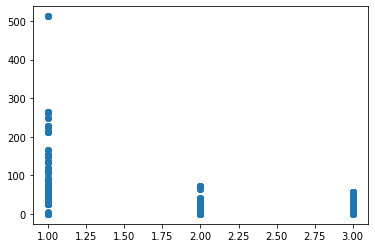

In [20]:
plt.scatter(train['Pclass'],train['Fare'])

In [21]:
train.groupby(by=['Pclass']).max()
# passanger with low fare can any of the three class, but the passange with fare > 73 units, belongs to first class

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,,,,,,,
1,1,male,80.0,3,4,512.3292,S
2,1,male,70.0,3,3,73.5000,S
3,1,male,74.0,5,6,56.4958,S


In [22]:
# train[train['Fare']>73].head()
#lets divide the fare into binary variable: 1 for > 73 units and 0 below it.
for i in train.index:
    if train.loc[i,'Fare'] > 73:       
        train.at[i,'FareGroup'] = 'low'
    else:
        train.at[i,'FareGroup'] = 'high' 

In [23]:
train.groupby(by=['FareGroup']).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
FareGroup,,,,,,
high,0.342711,2.466752,28.988152,0.438619,0.341432,18.282869
low,0.720000,1.050000,34.307433,0.670000,0.590000,137.498957


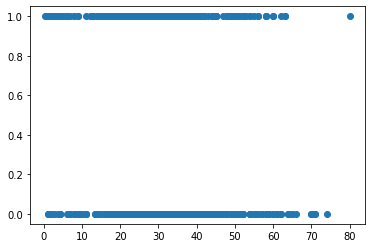

In [24]:
plt.scatter(train['Age'],train['Survived'])

Text(0.5, 0, 'Age')

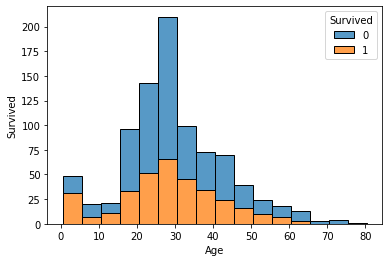

In [25]:
import seaborn as sns
sns.histplot(x='Age', data=train, binwidth=5, hue='Survived', multiple='stack')
plt.ylabel("Survived")
plt.xlabel('Age')

In [26]:
bins= [0,5,15,20,35,45,50,90]
labels = ['baby','kid','teen','young','mid_age','young_old','old']
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)

Text(0.5, 0, 'Age group')

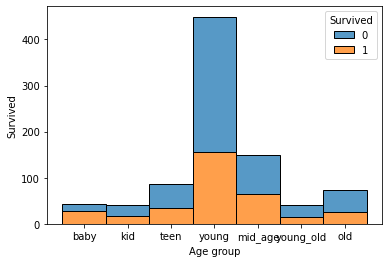

In [27]:
sns.histplot(x='AgeGroup', data=train, binwidth=5, hue='Survived', multiple='stack')
plt.ylabel("Survived")
plt.xlabel('Age group')

In [28]:
train_dummies = pd.get_dummies(train[['Sex','Embarked','SibSp','Parch','Pclass','AgeGroup','FareGroup']])
train = pd.concat([train,train_dummies],axis=1)
train.drop(columns=['Sex','Embarked','SibSp','Parch','Pclass','AgeGroup', 'Age','Fare','FareGroup'],inplace=True)
train.head()

,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_baby,AgeGroup_kid,AgeGroup_teen,AgeGroup_young,AgeGroup_mid_age,AgeGroup_young_old,AgeGroup_old,FareGroup_high,FareGroup_low
0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0
2,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0
3,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0


In [29]:
y_train = train['Survived']
x_train = train.drop(columns='Survived')

In [30]:
test.drop(columns=['PassengerId','Name','Ticket', 'Cabin'],inplace=True)
train.isnull().sum()

# for row_index, group in test_nan.iterrows():
#     for i, record in test[test['Age'].isnull()].iterrows():
#         if(record['Pclass']==row_index[1] and record['Parch']==row_index[2]):
#             test.at[i,'Age'] = mean_value.loc[row_index,]
            
            
# for i in test.index:
#     if test.loc[i,'Fare'] > 73:       
#         test.at[i,'FareGroup'] = 'low'
#     else:
#         test.at[i,'FareGroup'] = 'high' 
# test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)

# test_dummies = pd.get_dummies(test[['Sex','Embarked','SibSp','Parch','Pclass','AgeGroup','FareGroup']])
# test = pd.concat([test,test_dummies],axis=1)
# test.drop(columns=['Sex','Embarked','SibSp','Parch','Pclass','AgeGroup', 'Age','Fare','FareGroup'],inplace=True)

Survived              0
Sex_female            0
Sex_male              0
Embarked_C            0
Embarked_Q            0
Embarked_S            0
AgeGroup_baby         0
AgeGroup_kid          0
AgeGroup_teen         0
AgeGroup_young        0
AgeGroup_mid_age      0
AgeGroup_young_old    0
AgeGroup_old          0
FareGroup_high        0
FareGroup_low         0
dtype: int64

In [31]:
# from sklearn.tree import DecisionTreeClassifier
# dt = DecisionTreeClassifier()
# dt.fit(x_train, y_train)
# y_predict = dt.predict()